In [86]:
# Importer le fichier et afficher les premières lignes :
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('df_nettoyé_2.csv',sep =';', index_col=0)
df.head()

C:\Users\justb\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Code INSEE région,Région,Date,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Date_datetime,Mois,Date-heure,Annee,Jour_semaine,Production_totale
12,53,Bretagne,2013-01-01,0,3050.0,58.0,0.0,107.0,0.0,86.0,...,0.0,0.0,0.0,0.0,2013-01-01,1,2013-01-01-0,2013,1,271.0
13,75,Nouvelle-Aquitaine,2013-01-01,0,5464.0,240.0,4993.0,175.0,0.0,427.0,...,0.0,0.0,0.0,0.0,2013-01-01,1,2013-01-01-0,2013,1,5977.0
14,11,Île-de-France,2013-01-01,0,9134.0,685.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013-01-01,1,2013-01-01-0,2013,1,843.0
15,27,Bourgogne-Franche-Comté,2013-01-01,0,2357.0,236.0,0.0,106.0,0.0,105.0,...,0.0,0.0,0.0,0.0,2013-01-01,1,2013-01-01-0,2013,1,459.0
16,84,Auvergne-Rhône-Alpes,2013-01-01,0,8173.0,252.0,12069.0,257.0,0.0,3079.0,...,0.0,0.0,0.0,0.0,2013-01-01,1,2013-01-01-0,2013,1,15725.0


In [51]:
df.columns

Index(['Code INSEE région', 'Région', 'Date', 'Heure', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)',
       'TCH Nucléaire (%)', 'TCO Eolien (%)', 'TCH Eolien (%)',
       'TCO Solaire (%)', 'TCH Solaire (%)', 'TCO Hydraulique (%)',
       'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)',
       'Date_datetime', 'Mois', 'Date-heure', 'Annee', 'Jour_semaine',
       'Production_totale'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734900 entries, 12 to 1734911
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Date                 object 
 3   Heure                int64  
 4   Consommation (MW)    float64
 5   Thermique (MW)       float64
 6   Nucléaire (MW)       float64
 7   Eolien (MW)          float64
 8   Solaire (MW)         float64
 9   Hydraulique (MW)     float64
 10  Bioénergies (MW)     float64
 11  Ech. physiques (MW)  float64
 12  TCO Thermique (%)    float64
 13  TCH Thermique (%)    float64
 14  TCO Nucléaire (%)    float64
 15  TCH Nucléaire (%)    float64
 16  TCO Eolien (%)       float64
 17  TCH Eolien (%)       float64
 18  TCO Solaire (%)      float64
 19  TCH Solaire (%)      float64
 20  TCO Hydraulique (%)  float64
 21  TCH Hydraulique (%)  float64
 22  TCO Bioénergies (%)  float64
 23  TCH Bioénergies (%)  float64
 2

In [54]:
df.groupby(df["Annee"]).agg({"Consommation (MW)": sum})
#df.groupby(df["Annee"]).agg({"Production_totale": sum})
#df["Ecart"]=df["Production_totale"]- df["Consommation (MW)"]
#df.groupby(df["Annee"]).agg({"Ecart": sum})
#df.groupby(df["Annee"]).agg({"Ech. physiques (MW)": sum})

,Consommation (MW)
Annee,
2013,984134263.0
2014,924697156.0
2015,946305720.0
2016,960630996.0
2017,958089446.0
2018,951041999.0
2019,940954352.0
2020,891235974.0
2021,277053459.0


In [80]:
df_Annee_2018=df.loc[df["Annee"]==2018]
df_Annee_2019=df.loc[df["Annee"]==2019]
df_Annee_2020=df.loc[df["Annee"]==2020]
df["Ecart"]=df["Production_totale"]- df["Consommation (MW)"]

df_Annee_2020[["Production_totale", "Consommation (MW)","Région","Ecart","Ech. physiques (MW)"]].groupby("Région").sum()

,Production_totale,Consommation (MW),Ecart,Ech. physiques (MW)
Région,,,,
Auvergne-Rhône-Alpes,224661574.0,123542898.0,101118676.0,-93436524.0
Bourgogne-Franche-Comté,8357594.0,40162801.0,-31805207.0,31924373.0
Bretagne,8930580.0,43791308.0,-34860728.0,35007482.0
Centre-Val de Loire,140536914.0,36308702.0,104228212.0,-104228124.0
Grand Est,176251565.0,84795899.0,91455666.0,-90282240.0
Hauts-de-France,109801802.0,94591729.0,15210073.0,-15211252.0
Normandie,95574214.0,52695397.0,42878817.0,-42878905.0
Nouvelle-Aquitaine,100088096.0,83201039.0,16887057.0,-16888492.0
Occitanie,69546539.0,72736498.0,-3189959.0,6452974.0


In [6]:
df[["TCO Thermique (%)","TCO Nucléaire (%)","TCO Eolien (%)","TCO Solaire (%)","TCO Hydraulique (%)","TCO Bioénergies (%)","Annee"]].groupby("Annee").sum()
#df[["TCH Thermique (%)","TCH Nucléaire (%)","TCH Eolien (%)","TCH Solaire (%)","TCH Hydraulique (%)","TCH Bioénergies (%)","Annee"]].groupby("Annee").sum()

,TCO Thermique (%),TCO Nucléaire (%),TCO Eolien (%),TCO Solaire (%),TCO Hydraulique (%),TCO Bioénergies (%)
Annee,,,,,,
2013,0.00,0.00,0.00,0.00,0.000000e+00,0.00
2014,0.00,0.00,0.00,0.00,0.000000e+00,0.00
2015,0.00,0.00,0.00,0.00,0.000000e+00,0.00
2016,0.00,0.00,0.00,0.00,0.000000e+00,0.00
2017,0.00,0.00,0.00,0.00,0.000000e+00,0.00
2018,0.00,0.00,0.00,0.00,0.000000e+00,0.00
2019,0.00,0.00,0.00,0.00,0.000000e+00,0.00
2020,1608669.15,17803805.19,2022359.48,632808.83,2.512158e+06,472979.78
2021,510375.51,4270752.08,493433.61,78834.35,6.160236e+05,93501.30


In [81]:
#df_prod=df["Thermique (MW)","Nucléaire (MW)", "Eolien (MW)", "Solaire (MW)","Hydraulique (MW)","Bioénergies (MW)","Production_totale"]
#for col in df_prod :
    #df_prod[col] = df_prod[col]*100/df['Production_totale']

#df_prod

#df.apply(lambda x: x*100/df["Production_totale"])
#df
df[["Thermique (MW)","Nucléaire (MW)", "Eolien (MW)", "Solaire (MW)","Hydraulique (MW)","Bioénergies (MW)","Production_totale","Annee"]].groupby("Annee").sum()

,Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Production_totale
Annee,,,,,,,
2013,87265040.0,806802087.0,31665608.0,9008891.0,149129252.0,12227527.0,1.096098e+09
2014,49924365.0,831008785.0,34116918.0,11639659.0,134720263.0,15020879.0,1.076431e+09
2015,66714884.0,832908808.0,42188171.0,14572733.0,117039522.0,15832717.0,1.089257e+09
2016,88787737.0,767408645.0,41835426.0,16521789.0,126717599.0,17423013.0,1.058694e+09
2017,105507116.0,757772631.0,48194982.0,17987913.0,106026436.0,18877342.0,1.054366e+09
2018,75986264.0,785967028.0,56261568.0,21166093.0,134815101.0,19092161.0,1.093288e+09
2019,82152897.0,758459526.0,67631922.0,24204370.0,119002296.0,19321315.0,1.070772e+09
2020,73289349.0,670416234.0,78497826.0,25296031.0,128793983.0,18793676.0,9.950871e+08
2021,27366494.0,198416956.0,23645702.0,3960208.0,39399696.0,4834860.0,2.976239e+08


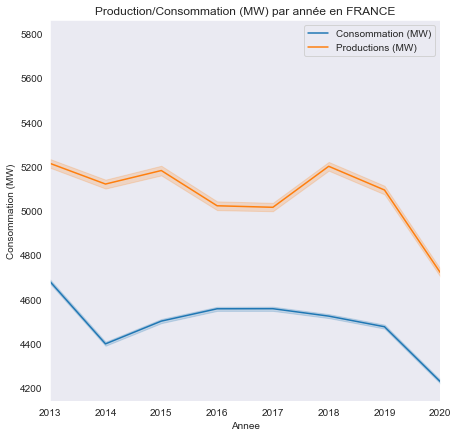

In [59]:
# Analyse de la consommation MW par année NIVEAU FRANCE
plt.figure(figsize=(7, 7))
sns.lineplot(x='Annee', y='Consommation (MW)',label= "Consommation (MW)", data=df)
sns.lineplot(x='Annee', y='Production_totale',label= "Productions (MW)", data=df)
plt.xlim(2013,2020)
plt.grid(False)
plt.legend()
plt.title('Production/Consommation (MW) par année en FRANCE')
plt.show();

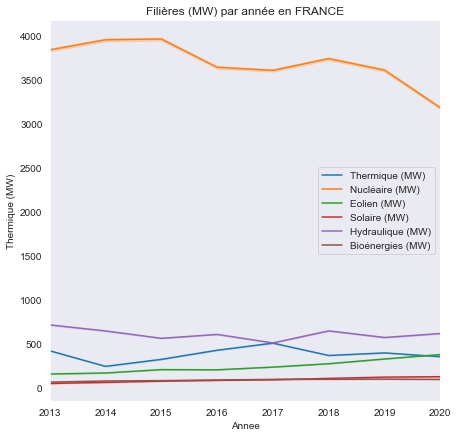

In [61]:
# Analyse par filière par année NIVEAU FRANCE
plt.figure(figsize=(7, 7))
#sns.lineplot(x='Annee', y='Consommation (MW)',label= "Consommation (MW)", data=df)
sns.lineplot(x='Annee', y='Thermique (MW)',label= "Thermique (MW)", data=df)
sns.lineplot(x='Annee', y='Nucléaire (MW)',label= "Nucléaire (MW)", data=df)
sns.lineplot(x='Annee', y="Eolien (MW)",label= "Eolien (MW)", data=df)
sns.lineplot(x='Annee', y='Solaire (MW)',label= 'Solaire (MW)', data=df)
sns.lineplot(x='Annee', y='Hydraulique (MW)',label= 'Hydraulique (MW)', data=df)
sns.lineplot(x='Annee', y='Bioénergies (MW)',label='Bioénergies (MW)', data=df)
plt.xlim(2013,2020)
plt.grid(False)
plt.legend()
plt.title('Filières (MW) par année en FRANCE')
plt.show();

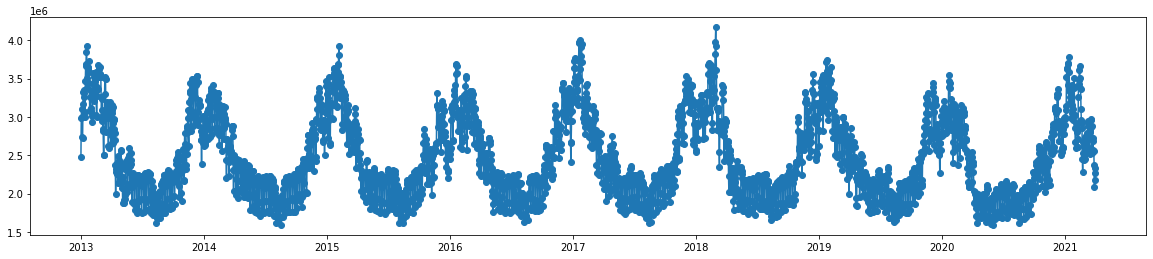

In [10]:
df= df.groupby(['Consommation (MW)', 'Date']).count().reset_index()
df.drop(df.iloc[:,2:],1,inplace=True)
df2=pd.pivot_table(df, index=['Date'], values=['Consommation (MW)'], aggfunc=np.sum)
df2 = df2.rename_axis('Date').reset_index()
df2['Date']= pd.to_datetime(df2['Date'])
values= df2['Date'].value_counts().sort_index()
plt.figure(figsize=(20,4))
plt.plot_date(values.index,df2['Consommation (MW)'], linestyle ='-' );

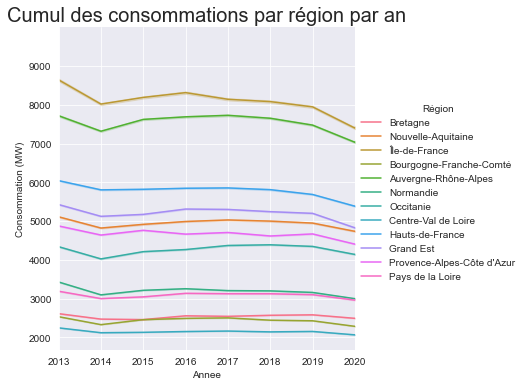

In [31]:
sns.relplot(x="Annee", y="Consommation (MW)",hue="Région",data=df,kind="line")
plt.xlim(2013,2020)
plt.title("Cumul des consommations par région par an", fontsize=20)
plt.show()

Text(0.5, 1.0, 'production éolien par régions')

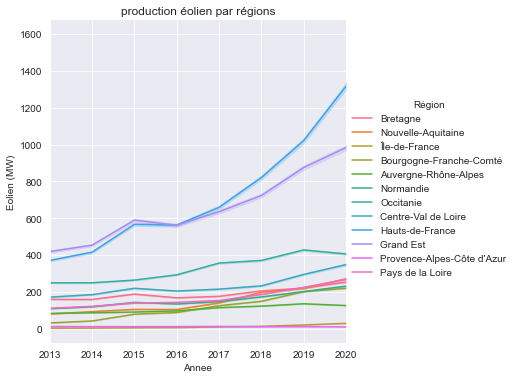

In [30]:
sns.relplot(x="Annee", y='Eolien (MW)', kind="line", data=df , hue ='Région')
plt.xlim(2013,2020)
plt.title('production éolien par régions')

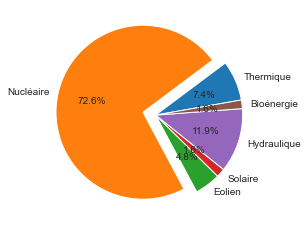

In [29]:
name = ['Thermique','Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Bioénergie']
data = [378.7,3694.2,244,83,608,81]
explode=(0, 0.15, 0, 0,0,0)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=10, )
plt.show()

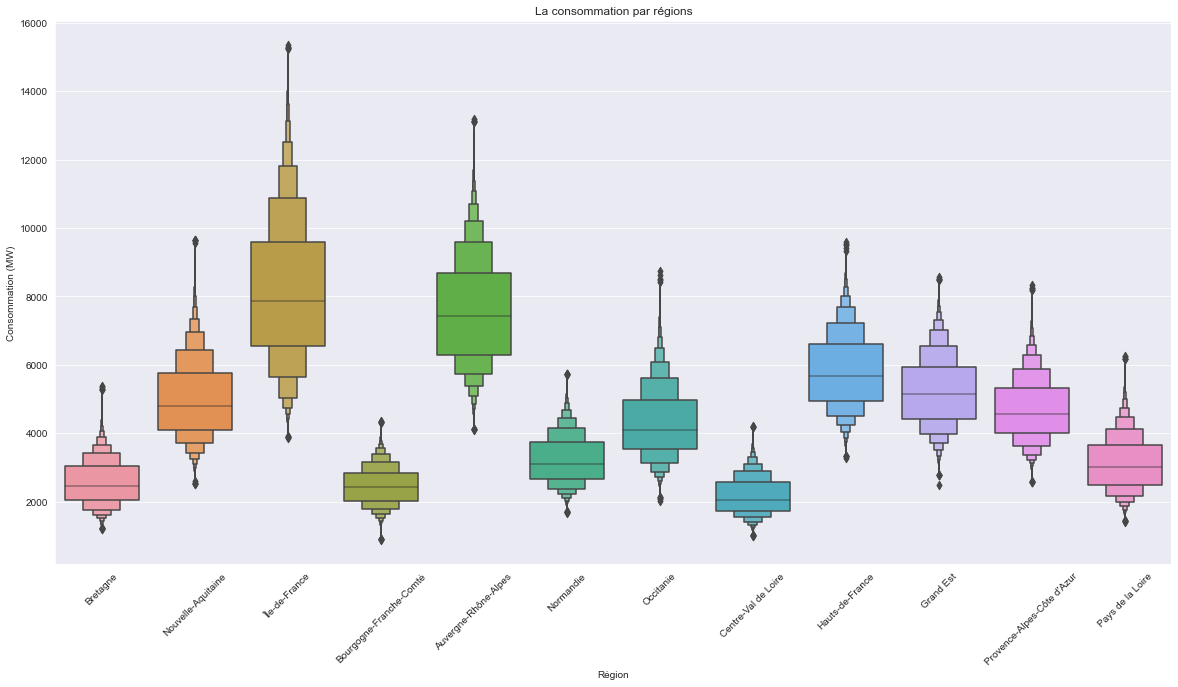

In [28]:
plt.figure(figsize=(20,10))
sns.boxenplot(x="Région", y='Consommation (MW)', data = df)
plt.xticks(rotation=45)
plt.xlabel('Région')
plt.ylabel('Consommation (MW)')
plt.title('La consommation par régions');

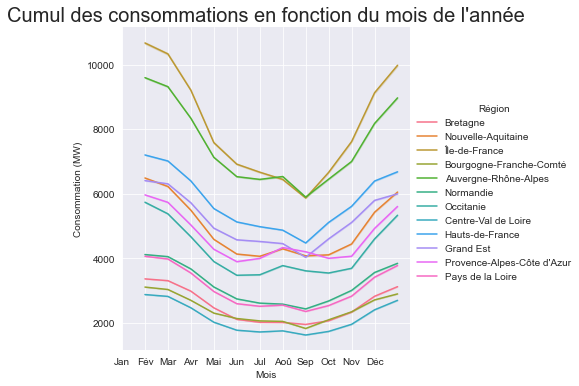

In [27]:
sns.relplot(
    data=df,
    x="Mois", y="Consommation (MW)",
    hue="Région",
    kind="line")
plt.title("Cumul des consommations en fonction du mois de l'année", fontsize=20)
plt.xticks(np.arange(12),['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']);

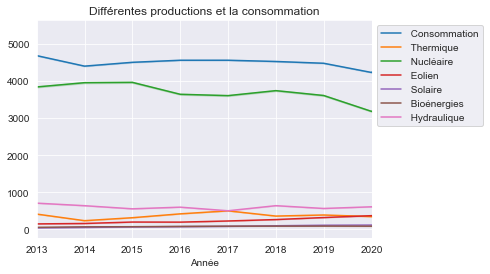

In [26]:
sns.lineplot(x='Annee', y='Consommation (MW)', data=df, label = ' Consommation')
sns.lineplot(x='Annee', y='Thermique (MW)', data=df, label = ' Thermique')
sns.lineplot(x='Annee', y='Nucléaire (MW)', data=df, label = ' Nucléaire ')
sns.lineplot(x='Annee', y='Eolien (MW)', data=df, label = ' Eolien')
sns.lineplot(x='Annee', y='Solaire (MW)', data=df, label = ' Solaire ')
sns.lineplot(x='Annee', y='Bioénergies (MW)', data=df, label = ' Bioénergies')
sns.lineplot(x='Annee', y='Hydraulique (MW)', data=df, label = ' Hydraulique ')
plt.xlim(2013,2020)
plt.title(label='Différentes productions et la consommation')
plt.xlabel('Année')
plt.ylabel('')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show();

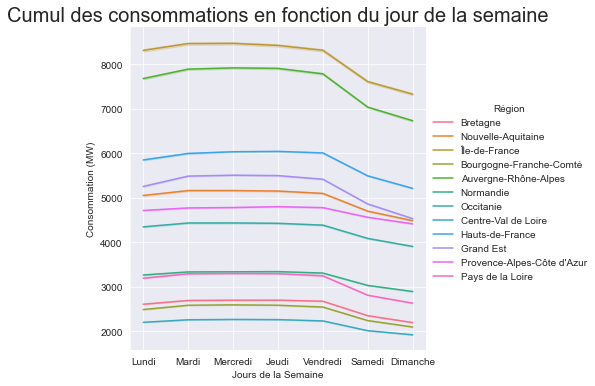

In [25]:
sns.relplot(
    data=df,
    x="Jour_semaine", y="Consommation (MW)",
    hue="Région",
    kind="line")
plt.title("Cumul des consommations en fonction du jour de la semaine", fontsize=20)
plt.xlabel("Jours de la Semaine")
plt.xticks(np.arange(7),['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']);

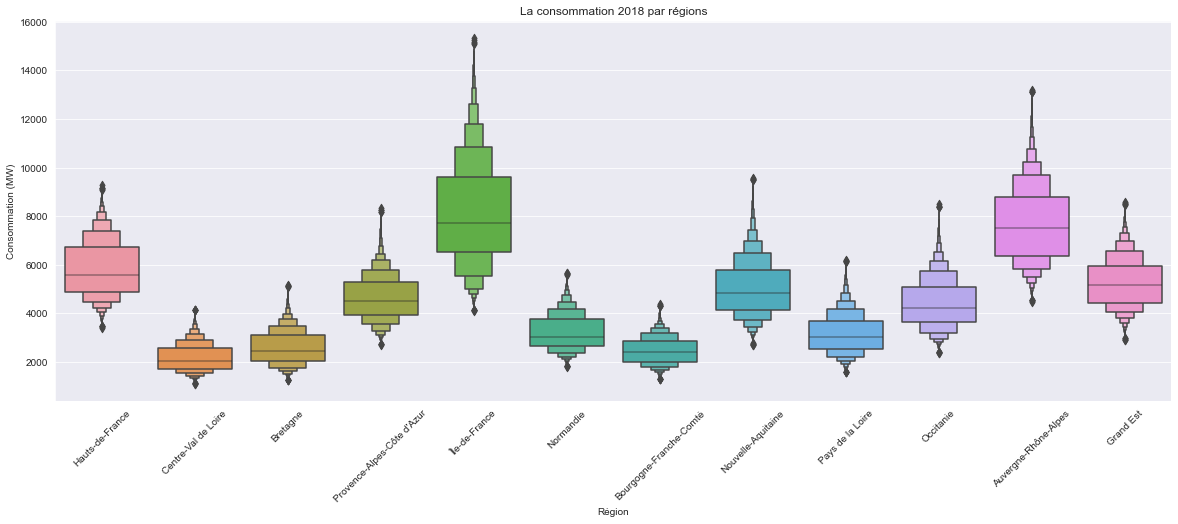

In [24]:
df_Annee_2018=df.loc[df["Annee"]==2018]

plt.figure(figsize=(20,7))
sns.boxenplot(x='Région', y='Consommation (MW)', data = df_Annee_2018)
plt.xticks(rotation=45)
plt.xlabel('Région')
plt.ylabel('Consommation (MW)')
plt.title('La consommation 2018 par régions');

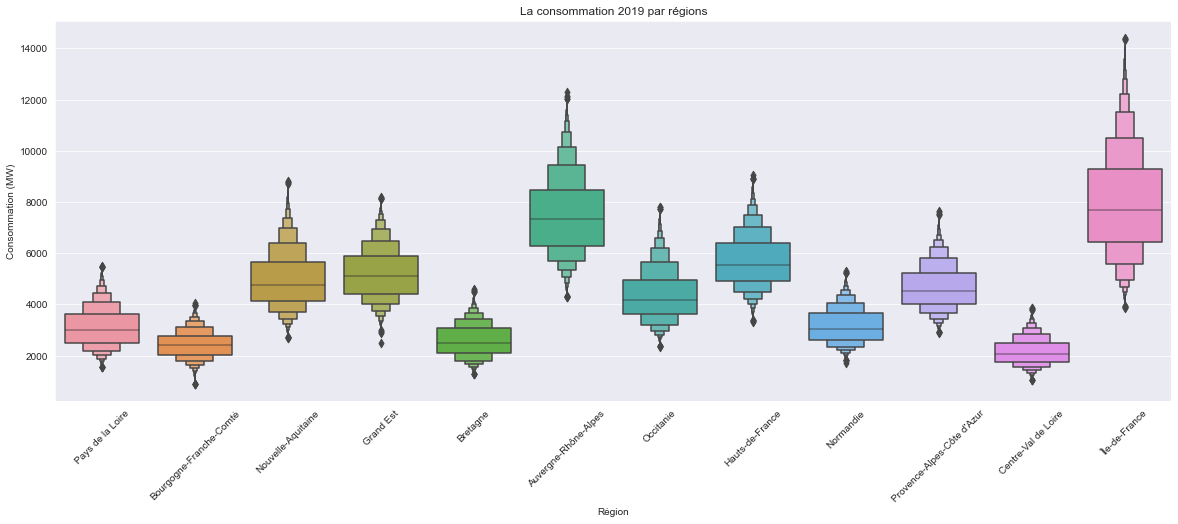

In [23]:
df_Annee_2019=df.loc[df["Annee"]==2019]
plt.figure(figsize=(20,7))
sns.boxenplot(x='Région', y='Consommation (MW)', data = df_Annee_2019)
plt.xticks(rotation=45)
plt.xlabel('Région')
plt.ylabel('Consommation (MW)')
plt.title('La consommation 2019 par régions');

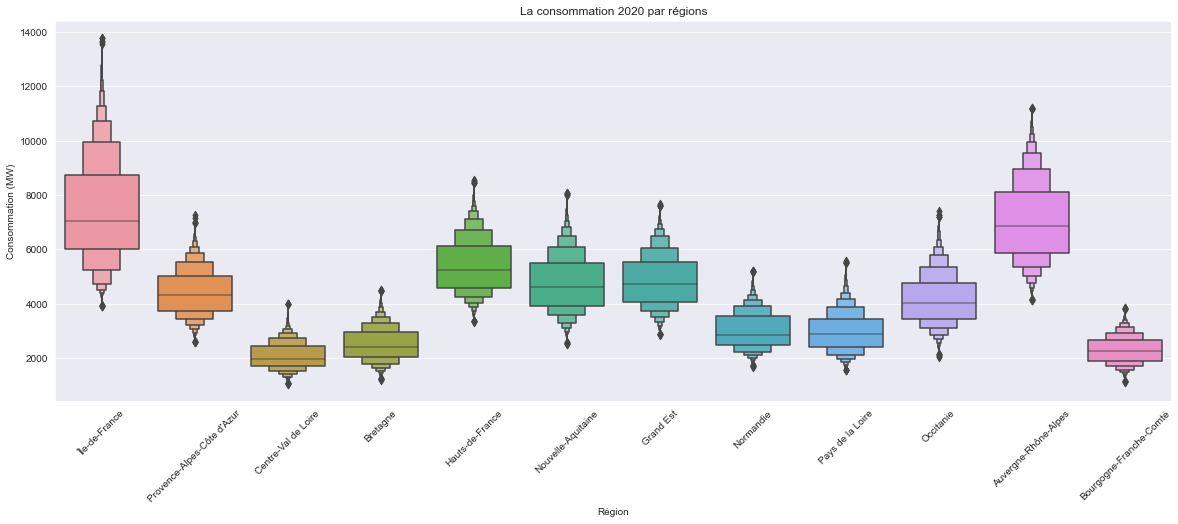

In [22]:
df_Annee_2020=df.loc[df["Annee"]==2020]
plt.figure(figsize=(20,7))
sns.boxenplot(x='Région', y='Consommation (MW)', data = df_Annee_2020)
plt.xticks(rotation=45)
plt.xlabel('Région')
plt.ylabel('Consommation (MW)')
plt.title('La consommation 2020 par régions');


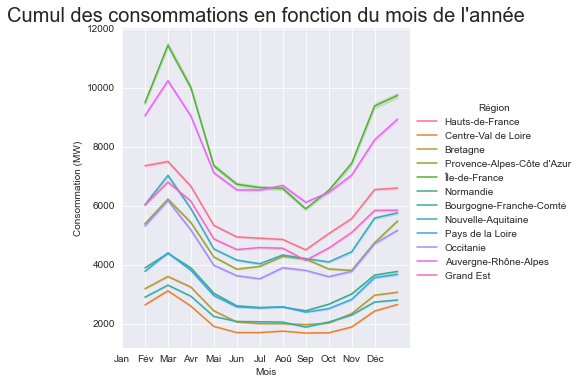

In [64]:
df_Annee_2018=df.loc[df["Annee"]==2018]
sns.relplot(
    data=df_Annee_2018,
    x="Mois", y="Consommation (MW)",
    hue="Région",
    kind="line")
plt.title("Cumul des consommations en fonction du mois de l'année", fontsize=20)
plt.xticks(np.arange(12),['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']);

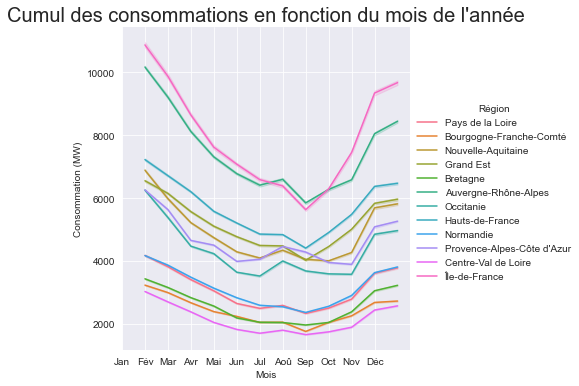

In [65]:
df_Annee_2019=df.loc[df["Annee"]==2019]
sns.relplot(
    data=df_Annee_2019,
    x="Mois", y="Consommation (MW)",
    hue="Région",
    kind="line")
plt.title("Cumul des consommations en fonction du mois de l'année", fontsize=20)
plt.xticks(np.arange(12),['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']);

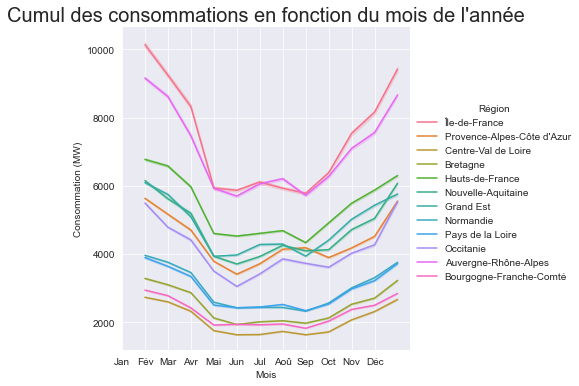

In [66]:
df_Annee_2020=df.loc[df["Annee"]==2020]
sns.relplot(
    data=df_Annee_2020,
    x="Mois", y="Consommation (MW)",
    hue="Région",
    kind="line")
plt.title("Cumul des consommations en fonction du mois de l'année", fontsize=20)
plt.xticks(np.arange(12),['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']);

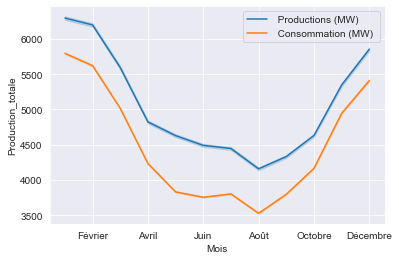

In [67]:
sns.lineplot(x='Mois', y='Production_totale', data=df, label = ' Productions (MW)')
sns.lineplot(x='Mois', y='Consommation (MW)', data=df, label = ' Consommation (MW) ')
plt.xticks([2,4,6,8,10,12],['Février', 'Avril','Juin', 'Août', 'Octobre', 'Décembre']);

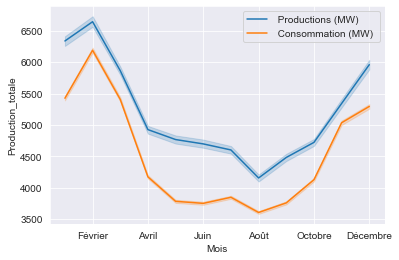

In [70]:
df_Annee_2018=df.loc[df["Annee"]==2018]
sns.lineplot(x='Mois', y='Production_totale', data=df_Annee_2018, label = ' Productions (MW)')
sns.lineplot(x='Mois', y='Consommation (MW)', data=df_Annee_2018, label = ' Consommation (MW) ')
plt.xticks([2,4,6,8,10,12],['Février', 'Avril','Juin', 'Août', 'Octobre', 'Décembre']);

([<matplotlib.axis.XTick at 0x1e29fc95400>,
 [Text(0, 0, 'Lundi'),
  Text(1, 0, 'Mardi'),
  Text(2, 0, 'Mercredi'),
  Text(3, 0, 'Jeudi'),
  Text(4, 0, 'Vendredi'),
  Text(5, 0, 'Samedi'),
  Text(6, 0, 'Dimanche')])

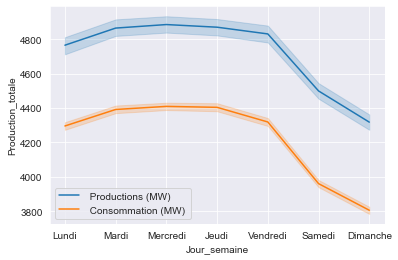

In [75]:
df_Annee_2020=df.loc[df["Annee"]==2020]
sns.lineplot(x='Jour_semaine', y='Production_totale', data=df_Annee_2020, label = ' Productions (MW)')
sns.lineplot(x='Jour_semaine', y='Consommation (MW)', data=df_Annee_2020, label = ' Consommation (MW) ')
plt.xticks(np.arange(7),['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])

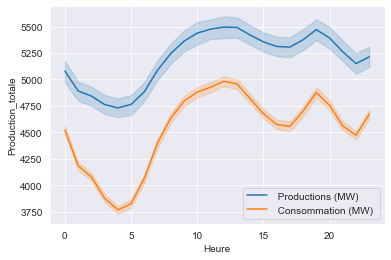

In [77]:
df_Annee_2018=df.loc[df["Annee"]==2018]
sns.lineplot(x='Heure', y='Production_totale', data=df_Annee_2018, label = ' Productions (MW)')
sns.lineplot(x='Heure', y='Consommation (MW)', data=df_Annee_2018, label = ' Consommation (MW) ')
plt.show();

Text(0.5, 1.0, 'Ech.physiques par régions')

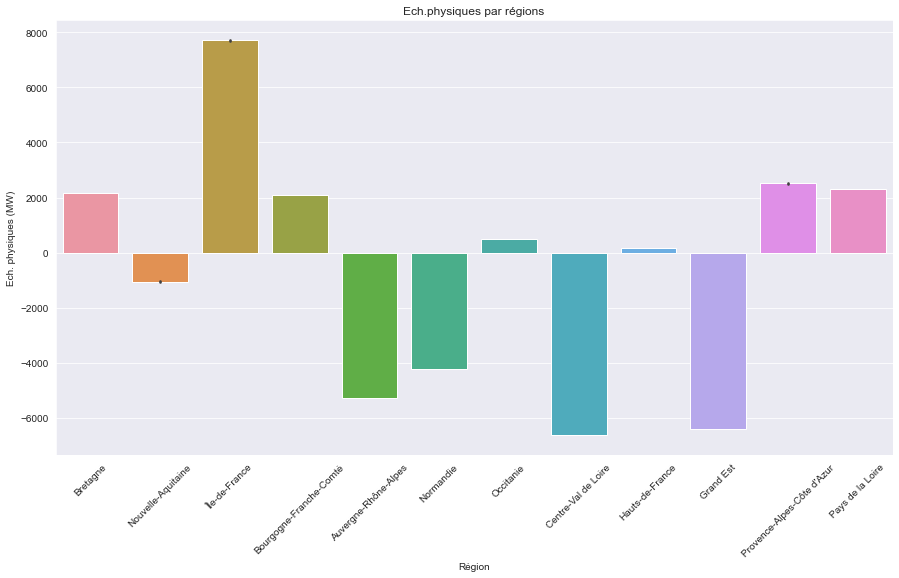

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.barplot(x='Région', y='Ech. physiques (MW)',data=df)
plt.xticks(rotation=45)
plt.title('Ech.physiques par régions')


In [88]:
#df_Annee_2020.describe()
#df_Annee_2019.describe()
df_Annee_2018.describe()

,Code INSEE région,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Ech. physiques (MW),...,TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Mois,Annee,Jour_semaine,Production_totale,Ecart
count,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,...,210240.0,210240.0,210240.0,210240.0,210240.0,210240.000000,210240.0,210240.000000,210240.000000,210240.000000
mean,49.916667,11.500000,4523.601593,361.426294,3738.427645,267.606393,100.675861,641.243821,90.811268,-606.232254,...,0.0,0.0,0.0,0.0,0.0,6.526027,2018.0,2.991781,5200.191281,676.589688
std,25.640063,6.922203,2195.806141,534.083215,3873.087326,422.435873,237.068555,1100.879026,48.416855,4374.679827,...,0.0,0.0,0.0,0.0,0.0,3.447860,0.0,2.003410,4582.660937,4411.214473
min,11.000000,0.000000,1076.000000,-83.000000,0.000000,-3.000000,-2.000000,0.000000,17.000000,-12191.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,2018.0,0.000000,19.000000,-13960.000000
25%,27.750000,5.750000,2801.000000,20.000000,0.000000,29.000000,0.000000,4.000000,48.000000,-4333.000000,...,0.0,0.0,0.0,0.0,0.0,4.000000,2018.0,1.000000,652.000000,-2157.000000
50%,48.000000,11.500000,4140.000000,160.000000,2606.000000,115.000000,0.000000,55.000000,86.000000,197.000000,...,0.0,0.0,0.0,0.0,0.0,7.000000,2018.0,3.000000,4692.000000,-72.000000
75%,75.250000,17.250000,5753.000000,427.000000,7313.000000,322.000000,72.000000,919.250000,123.000000,2173.250000,...,0.0,0.0,0.0,0.0,0.0,10.000000,2018.0,5.000000,8274.000000,4529.000000
max,93.000000,23.000000,15338.000000,2697.000000,12682.000000,3448.000000,1919.000000,8103.000000,318.000000,13959.000000,...,0.0,0.0,0.0,0.0,0.0,12.000000,2018.0,6.000000,21310.000000,12192.000000


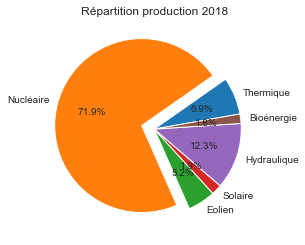

In [47]:
#2018
name = ['Thermique','Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Bioénergie']
data = [361,3738,268,101,641,91]
explode=(0, 0.15, 0, 0,0,0)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=10)
plt.title("Répartition production 2018")
plt.show()


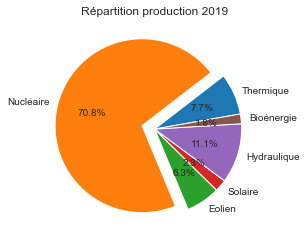

In [49]:
#2019
name = ['Thermique','Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Bioénergie']
data = [391,3608,322,115,566,92]
explode=(0, 0.15, 0, 0,0,0)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=10)
plt.title("Répartition production 2019")
plt.show()

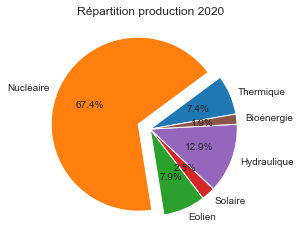

In [89]:
#2020
name = ['Thermique','Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Bioénergie']
data = [348,3180,372,120,611,89]
explode=(0, 0.15, 0, 0,0,0)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=10)
plt.title("Répartition production 2020")
plt.show()

<AxesSubplot:xlabel='Région'>

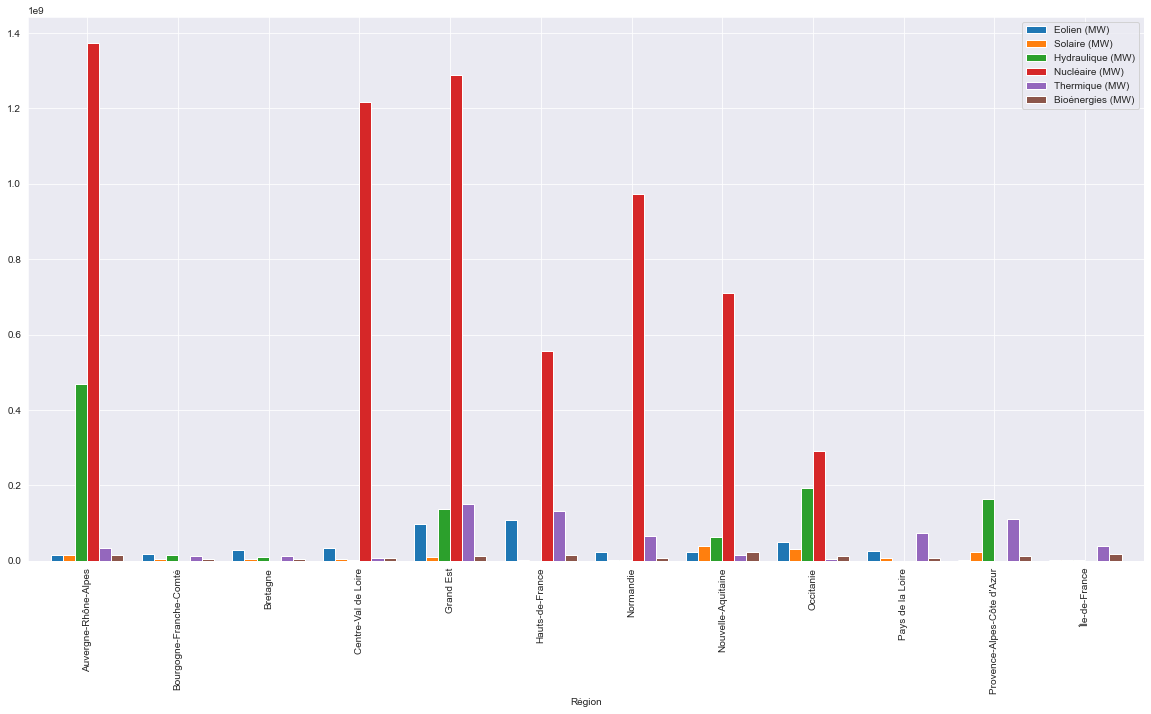

In [90]:
df_group = df.groupby(['Région', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Nucléaire (MW)', 'Thermique (MW)', 'Bioénergies (MW)']).count().reset_index()
df_group.drop(df_group.iloc[:,7:],1,inplace=True)
df_group=pd.pivot_table(df_group, index=['Région'], values=['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Nucléaire (MW)', 'Thermique (MW)', 'Bioénergies (MW)'], aggfunc=np.sum)
df_sum = df_group.rename_axis('Région').reset_index()
barWidth = 0.8
df_sum.plot.bar(x='Région',y=['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Nucléaire (MW)', 'Thermique (MW)', 'Bioénergies (MW)'],figsize=(20,10),width = barWidth)